# Team members                              ID
* Omnia Tarek ..................................... 3
* Rawan Mohamed ............................4
* Rana Mohamed .............................. 5

# Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
import numpy as np

# Loading the Dataset

In [3]:
# Load the cifar100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# setting with_infor attribute to true to get the metadata which contains the labels' names
_ , info = tfds.load('cifar100', with_info=True)
classes_names = info.features['label'].names
print(classes_names)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/incomplete.OMGWTD_3.0.2/cifar100-train.tfrecord*...:   0%|       …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/incomplete.OMGWTD_3.0.2/cifar100-test.tfrecord*...:   0%|        …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 't

In [4]:
print("Train set Shape: ", x_train.shape)
print("Train Labels Shape: ", y_train.shape)
print("Test Images Shape: ", x_test.shape)
print("Test Labels Shape: ", y_test.shape)

Train set Shape:  (50000, 32, 32, 3)
Train Labels Shape:  (50000, 1)
Test Images Shape:  (10000, 32, 32, 3)
Test Labels Shape:  (10000, 1)


**There are 50000 images in the training dataset and each image is a 3 color channel 32 * 32 pixel image (32 * 32 * 3 = 3072)**


# Utility Functions

In [5]:
def acc_loss_plots():
    # Plot the loss curves
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()

    # Plot the accuracy curves
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.legend()
    plt.show()

In [6]:
def visualize_predictions(predictions, x_test, y_test, class_names, num_images=20,rows = 4,cols=5):

    plt.figure(figsize=(15, 15)) 

    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)  
        # removing xticks, yticks and grid lines for a better display
        plt.xticks([])  
        plt.yticks([])  
        plt.grid(False)  

        # display the test image
        plt.imshow(x_test[i], cmap=plt.cm.binary)

        # find the predicted label (the index with the highest probability)
        predicted_label = np.argmax(predictions[i])
        # find the true label from the one-hot encoded format
        true_label = np.argmax(y_test[i])

        # color the text green if the prediction is correct, red otherwise
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'

        # display the predicted label and true label
        plt.xlabel(f"{class_names[predicted_label]} (True: {class_names[true_label]})", color=color)

    plt.tight_layout()  
    plt.show() 


In [7]:

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predictions, y_test, class_names, sample_size=10, color="Blues"):
    # convert predicted probabilities to class indices
    pred_classes = np.argmax(predictions, axis=1)

    # calculate the confusion matrix
    cm = confusion_matrix(np.argmax(y_test, axis=1), pred_classes)

    # take a sample form the confusion matrix
    cm_sampled = cm[:sample_size, :sample_size]
    class_names_sampled = class_names[:sample_size]

    # plot the sampled confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm_sampled, annot=True, fmt='d', cmap=color,
                xticklabels=class_names_sampled, yticklabels=class_names_sampled)
    
    plt.xlabel('Predicted', color='purple')
    plt.ylabel('True', color='green')
    plt.title('Sample of the Confusion Matrix', color='blue')
    plt.show()


# Data Preprocessing

In [8]:
# Normalization of the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# Convert the numeric labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Visualizing the Data

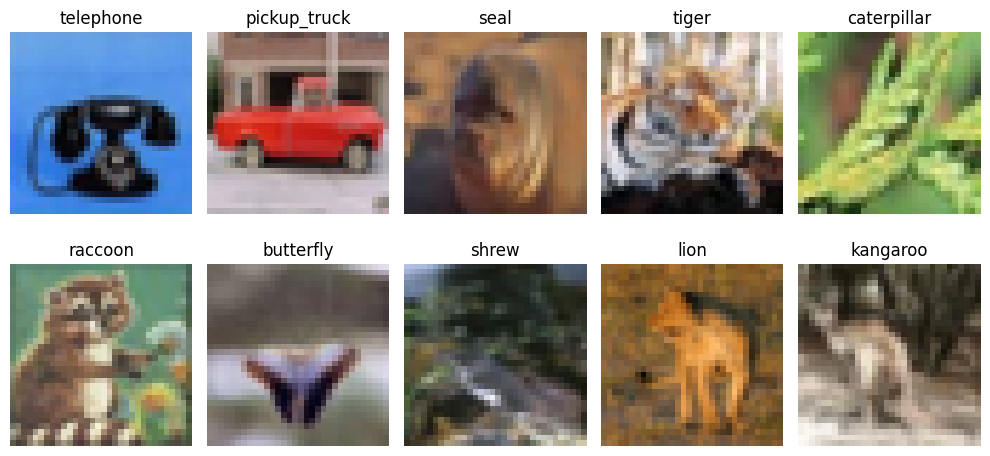

In [10]:
# displaying a sample of data
sample_indices = np.random.choice(len(x_train), size=10, replace=False)
sample_images = x_train[sample_indices]
sample_labels = y_train[sample_indices]

# display the images with their corresponding class names
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])

    # getting the correct label for the subplot title by using argmax to find the index of the highest probability 
    # from the predicted label array (one-hot encoded)and this index corresponds to the predicted class.
    label_index = (np.argmax(sample_labels[i]))
    plt.title(classes_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Data Augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # rotate images randomly within 20 degrees
    horizontal_flip=True,  # flip images horizontally
)

# apply the data generator to the data
train_gen = datagen.flow(x_train, y_train, batch_size=128)
val_gen = datagen.flow(x_test, y_test, batch_size=128)


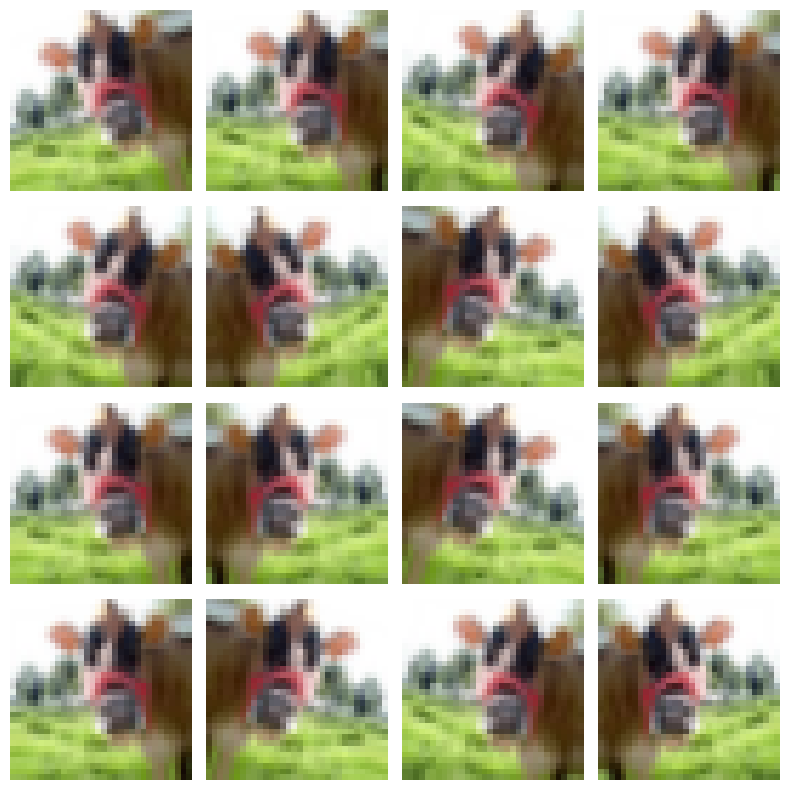

In [12]:
# visualization of the data augmentation on an image
# Subplot grid for displaying images
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(8, 8)

# image from the dataset to display the data augmentation applied to it
image = x_train[0]

for i in range(4):
    for j in range(4):
        # data augmentation is applied
        # np.expand_dims(image, axis=0) as ImageDataGenerator expects batches of images as input
        # and adding a new dimension (with size 1) makes the image a batch of 1 image.
        augmented_images = datagen.flow(np.expand_dims(image, axis=0), batch_size=1)

        # next() is used to retrieve the next batch of augmented images from the generator
        # to get different augmentations of the same input image.
        augmented_image = next(augmented_images)[0]

        # displaying the augmented image in the current subplot
        ax[i, j].imshow(augmented_image)
        ax[i, j].axis('off')

plt.tight_layout()
plt.show()

# Ordinary Neural Network

In [51]:
# building neural network model
ord_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
# compile the model
ord_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
ord_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

**Expected accuracy:**


Low as using a simple normal neural network on a complex dataset like cifar100 dataset is not very effective because:
cifar100 contains complex images with 100 classes, and each image has alot of details.
Ordinary Neural Network often lack the capacity to capture patterns like (edges, textures) compared to CNNs, which are designed to handle image data more efficiently.

In [75]:
# train the model and store the results(accuracy,loss) in history object
history = ord_model.fit(train_gen, epochs=30, validation_data=val_gen)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.0453 - loss: 4.3640 - val_accuracy: 0.1090 - val_loss: 3.8470
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.1221 - loss: 3.7778 - val_accuracy: 0.1405 - val_loss: 3.6769
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.1498 - loss: 3.6128 - val_accuracy: 0.1706 - val_loss: 3.5495
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.1738 - loss: 3.4901 - val_accuracy: 0.1777 - val_loss: 3.4935
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.1826 - loss: 3.4210 - val_accuracy: 0.1881 - val_loss: 3.4577
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.1955 - loss: 3.3496 - val_accuracy: 0.1964 - val_loss: 3.3790
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.2096 - loss: 3.2797 - val_accuracy: 0.2038 - val_loss: 3.3654
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.2164 - loss: 3.2417 - 

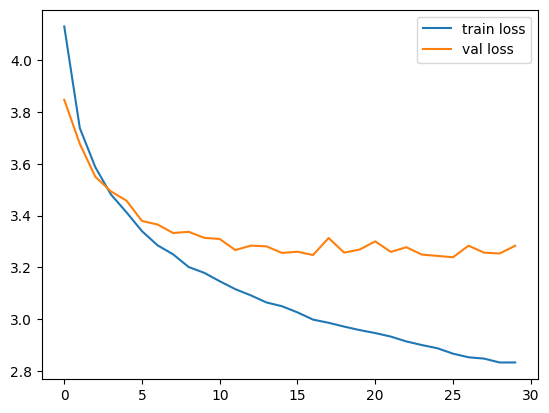

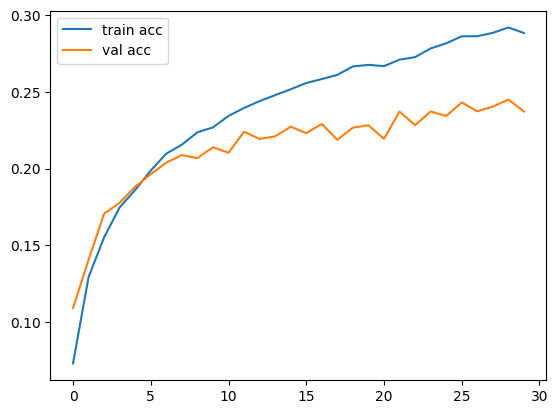

In [76]:
acc_loss_plots()

In [77]:
test_loss, test_acc = ord_model.evaluate(x_test,y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.2453 - loss: 3.2547

Test accuracy: 0.24529999494552612


In [78]:
# make predictions
predictions = ord_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


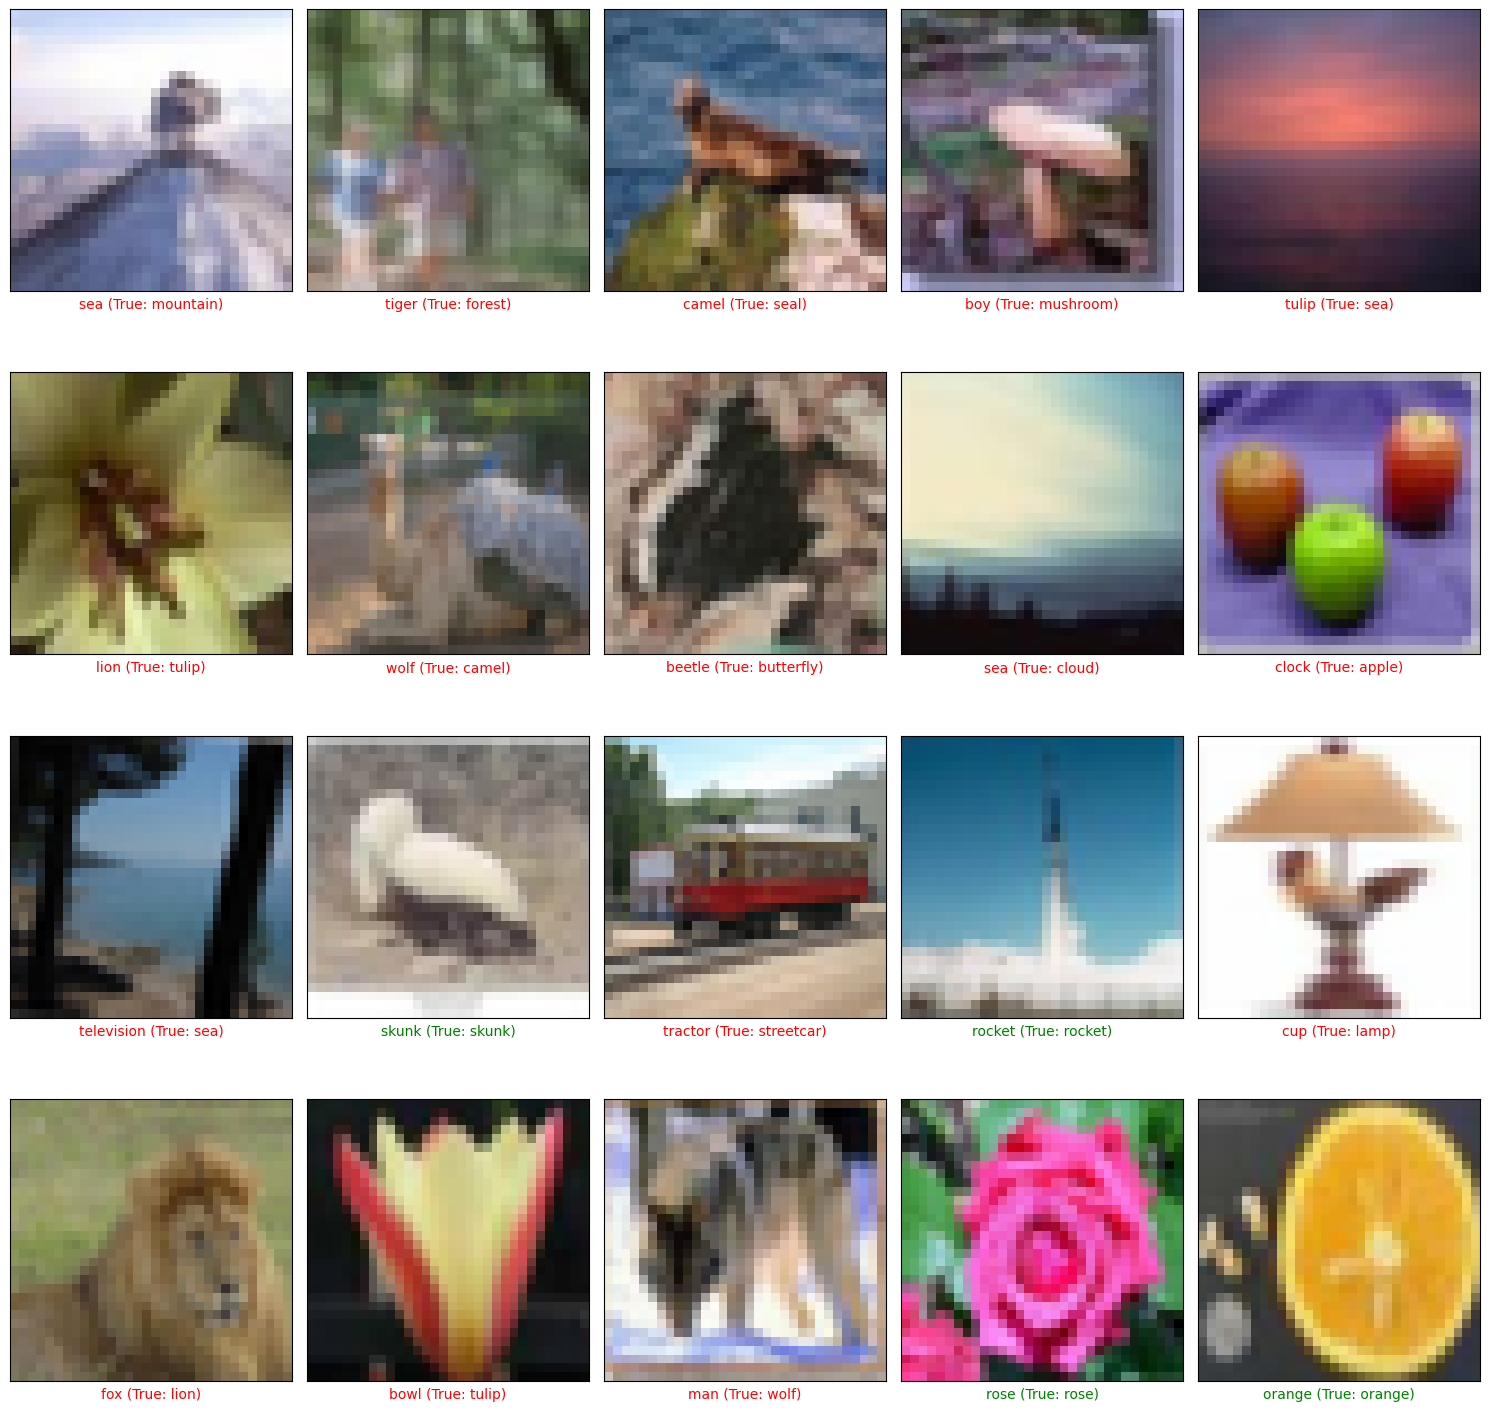

In [79]:
# visualize some predictions
visualize_predictions(predictions, x_test, y_test, classes_names, 20,4,5)

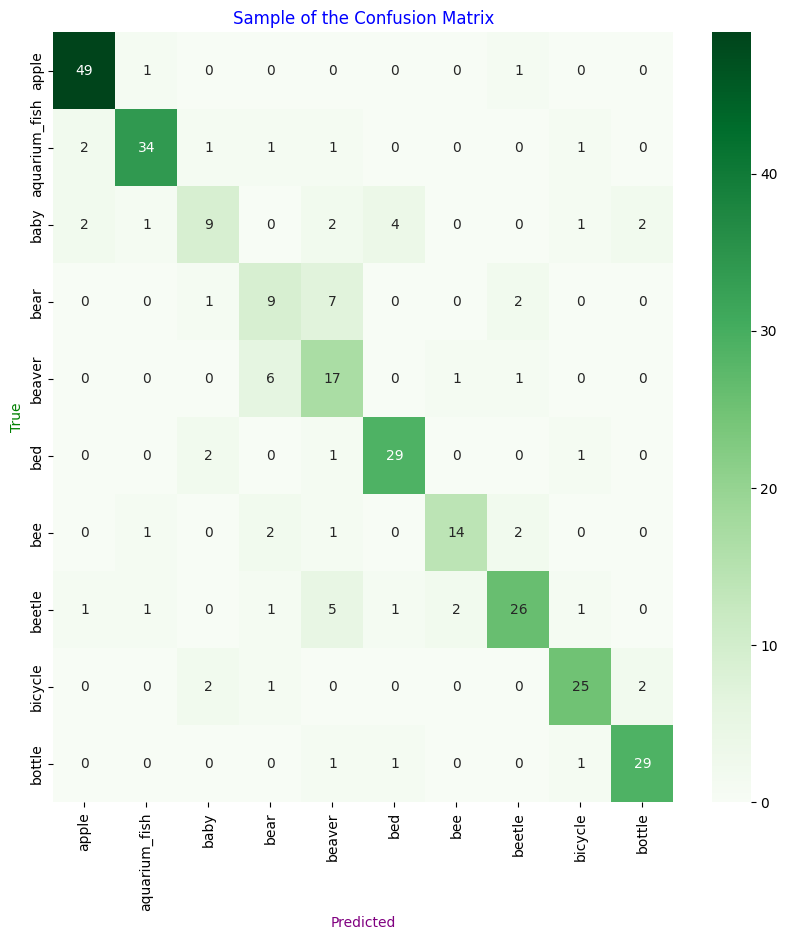

In [80]:
plot_confusion_matrix(predictions, y_test, classes_names, sample_size=10, color="Greens")

# CNN model from scratch

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential([
    # Convolutional layers
    Conv2D(filters=16, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Dropout layer to prevent overfitting
    Dropout(0.3),

    # Flatten layer to convert 3D feature maps into 1D vector
    Flatten(),

    # One Dense layer to capture relationships between extracted features
    Dense(256, activation='relu'), 
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output layer for 100 classes with softmax activation for multiclass classification
    Dense(100, activation='softmax')
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,236 (997.02 KB)

 Trainable params: 255,236 (997.02 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# train the model and store the results(accuracy,loss) in history object
history = model.fit(train_gen, epochs=50, validation_data=val_gen)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.0269 - loss: 4.4296 - val_accuracy: 0.1055 - val_loss: 3.8561
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.0965 - loss: 3.8647 - val_accuracy: 0.1690 - val_loss: 3.4842
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.1491 - loss: 3.5686 - val_accuracy: 0.2111 - val_loss: 3.2755
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.1819 - loss: 3.3775 - val_accuracy: 0.2406 - val_loss: 3.1359
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.2075 - loss: 3.2576 - val_accuracy: 0.2581 - val_loss: 3.0256
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.2206 - loss: 3.1758 - val_accuracy: 0.2711 - val_loss: 2.9433
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.2388 - loss: 3.0866 - val_accuracy: 0.2814 - val_loss: 2.8896
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.2463 - loss: 3.0324 -

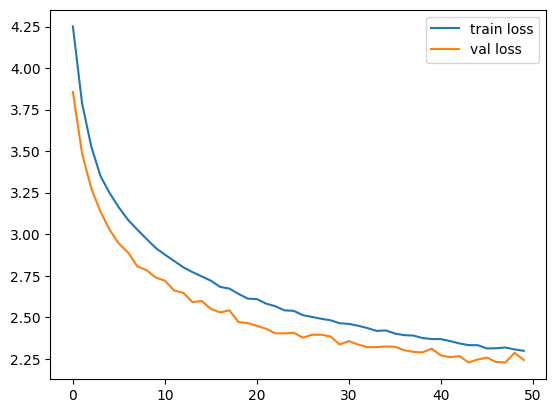

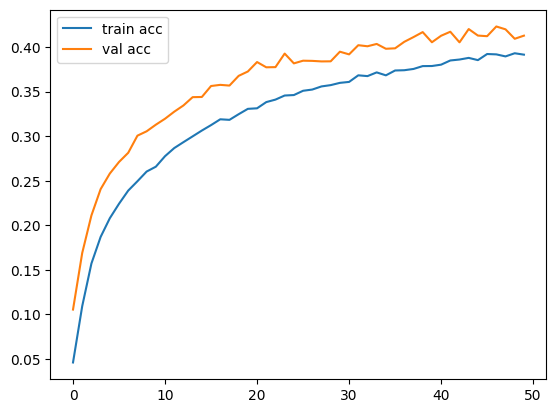

In [68]:
acc_loss_plots()

In [69]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.4256 - loss: 2.2194

Test accuracy: 0.42559999227523804


In [70]:
# make predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


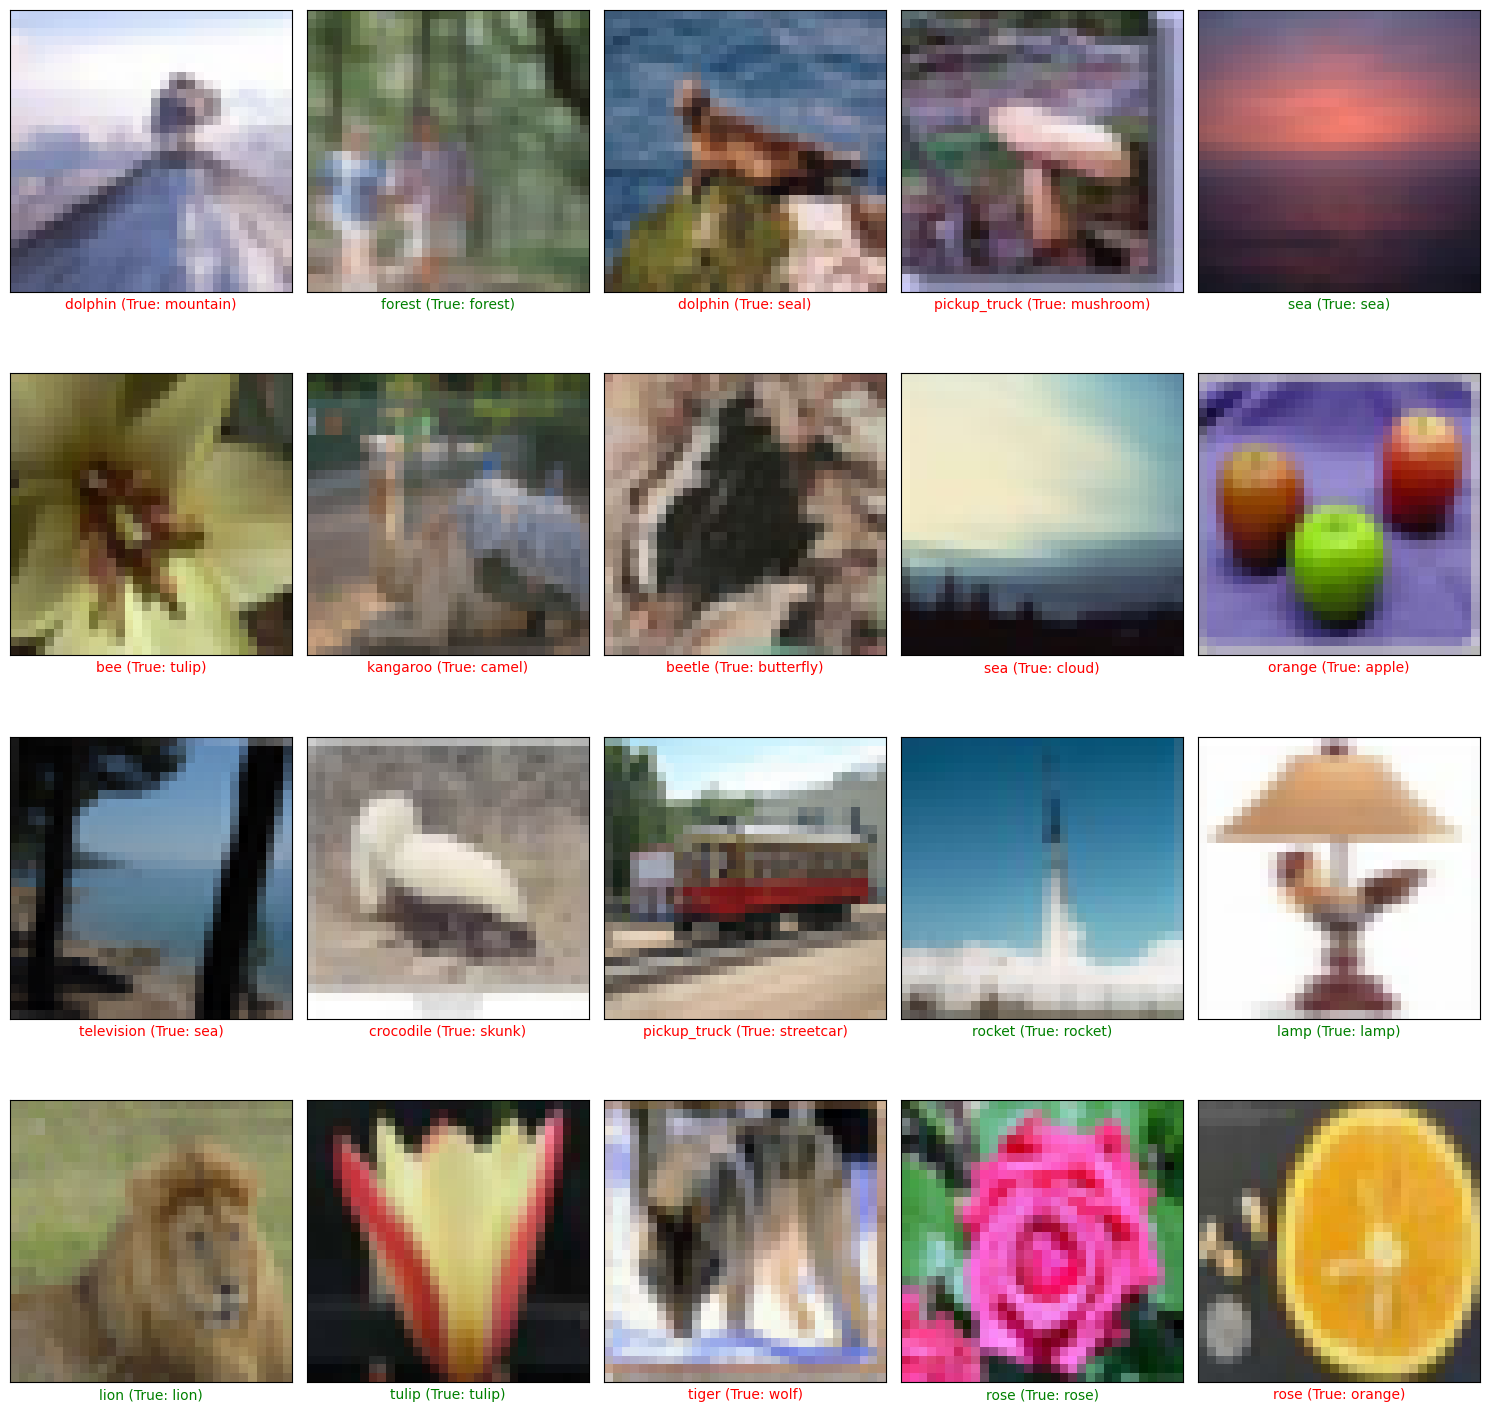

In [71]:
# visualize some predictions
visualize_predictions(predictions, x_test, y_test, classes_names, 20,4,5)

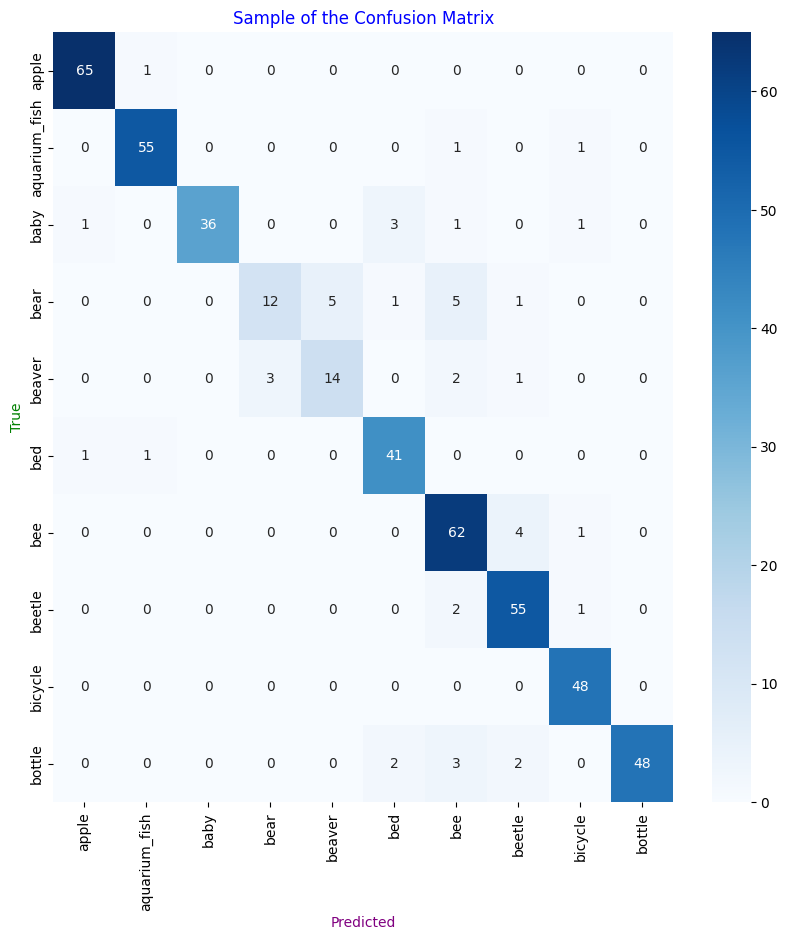

In [72]:
plot_confusion_matrix(predictions, y_test, classes_names, sample_size=10, color="Blues")

# Improved CNN Architecture

**Batch Normalization Concept**

instead of just normalizing the input only and fed it into the network. We normalize the output of all the layers of the network.

It helps the network overcome the unstable gradients. 
As neural networks train, the outputs of neurons in each layer can shift due to updates in the weights.this occurs because the inputs to each layer depend on the outputs of the previous layers and as the parameters in earlier layers change so do the inputs to later layers.
This shift slows down training because the layers constantly need to adjust to the new distributions. It often leads to issues like vanishing gradients or exploding gradients in deep networks making it hard for the network to learn effectively.

Batch normalization helps by reducing the amount of change in the distribution of layer inputs during training making the training process more stable and allowing higher learning rates.

![Batch_normalization](https://miro.medium.com/v2/resize:fit:828/format:webp/1*bmUMfnuDe3WYdwDVh1iK-w.jpeg)

In [14]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model_enhanced = Sequential([
    # Convolution Layers    
    Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    # Flatten layer to convert 3D feature maps into 1D vector
    Flatten(),

    # Dense layer with Batch Normalization
    Dense(1024,activation = 'relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    BatchNormalization(),
    # Output layer for 100 classes with softmax activation for multiclass classification
    Dense(100, activation='softmax')
])


In [17]:
# compile the model
model_enhanced.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_enhanced.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,09

 Total params: 13,821,796 (52.73 MB)

 Trainable params: 13,815,652 (52.70 MB)

 Non-trainable params: 6,144 (24.00 KB)

In [18]:
# train the model and store the results(accuracy,loss) in history object
history = model_enhanced.fit(train_gen, epochs=20, validation_data=val_gen)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725760927.167615     121 service.cc:145] XLA service 0x79f71c008dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725760927.167670     121 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725760927.167674     121 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/391 ━━━━━━━━━━━━━━━━━━━━ 3:09:35 29s/step - accuracy: 0.0156 - loss: 5.4789

I0000 00:00:1725760950.848416     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 168ms/step - accuracy: 0.0872 - loss: 4.3003 - val_accuracy: 0.0567 - val_loss: 4.6582
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 125ms/step - accuracy: 0.2346 - loss: 3.1650 - val_accuracy: 0.2668 - val_loss: 2.9849
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.3295 - loss: 2.6192 - val_accuracy: 0.3392 - val_loss: 2.6622
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.4153 - loss: 2.2293 - val_accuracy: 0.4082 - val_loss: 2.2863
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.4712 - loss: 1.9553 - val_accuracy: 0.4900 - val_loss: 1.9115
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.5232 - loss: 1.7371 - val_accuracy: 0.5066 - val_loss: 1.8876
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.5625 - loss: 1.5621 - val_accuracy: 0.5323 - val_loss: 1.7591
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.5984 - loss: 1.4282 - val

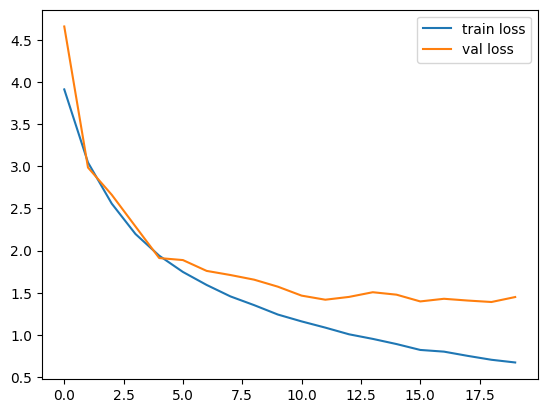

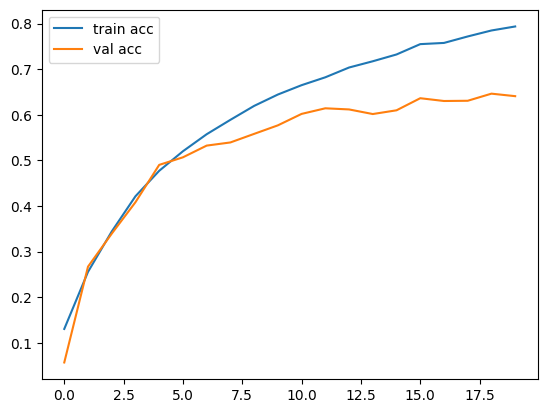

In [19]:
acc_loss_plots()

In [61]:
test_loss, test_acc = model_enhanced.evaluate(x_test,y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 6s - 18ms/step - accuracy: 0.6361 - loss: 1.4227

Test accuracy: 0.6360999941825867


In [62]:
# make predictions
predictions = model_enhanced.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


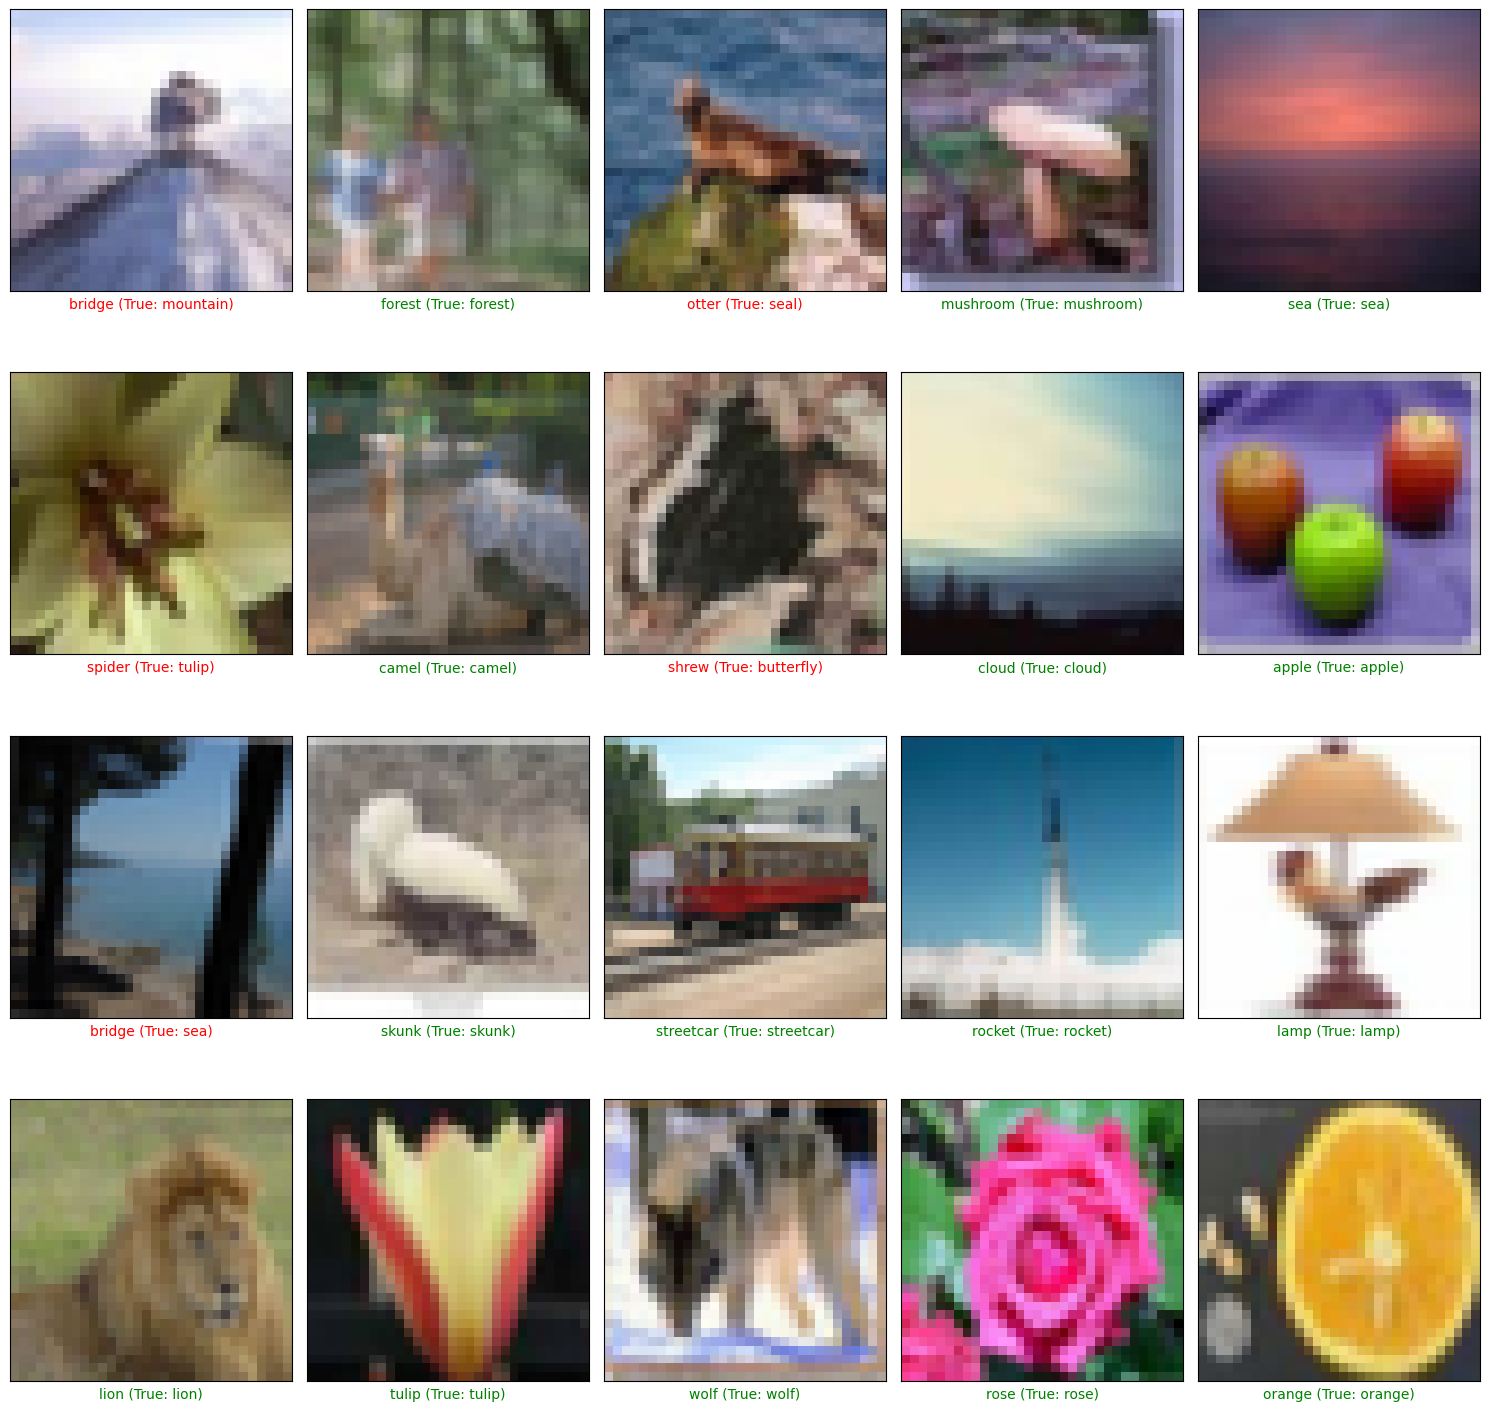

In [63]:
# visualize some predictions
visualize_predictions(predictions, x_test, y_test, classes_names, 20,4,5)

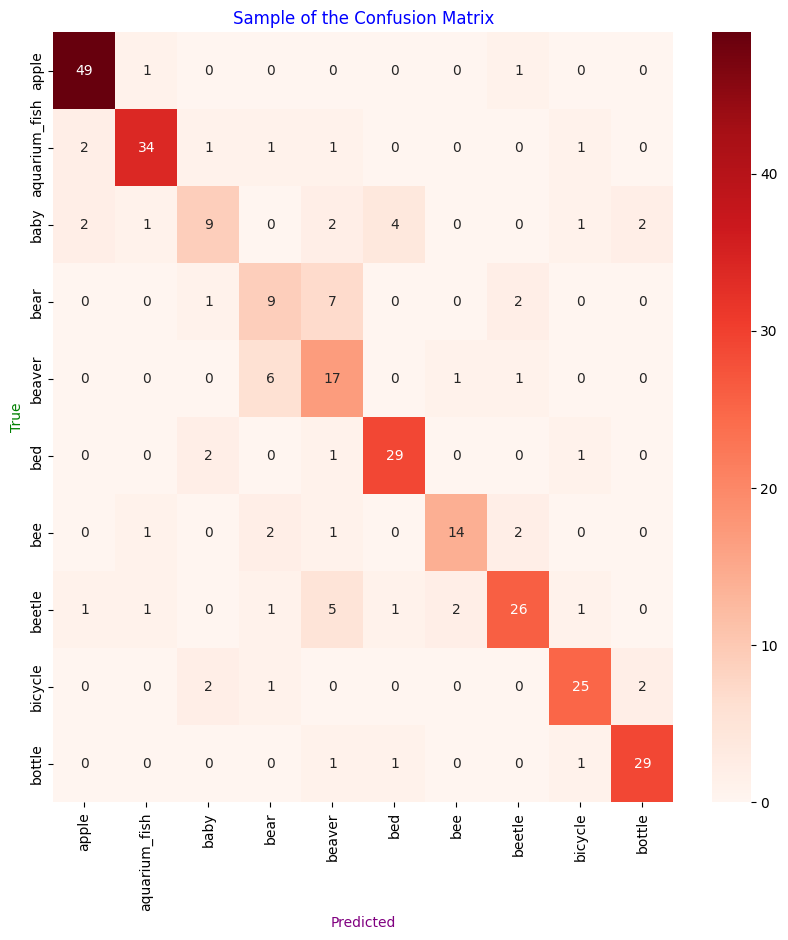

In [82]:
plot_confusion_matrix(predictions, y_test, classes_names, sample_size=10, color="Reds")

# Transfer Learning on Resnet50V2

In [30]:
resnet_base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

resnet_base_model.trainable = False
# Unfreeze the last 50 layers of ResNet50V2
for layer in resnet_base_model.layers[-50:]:
    layer.trainable = True

# Add custom classification layers on top of the ResNet50 base
resnet_model = models.Sequential([
    resnet_base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2048, activation='relu'),  # Increased units
    layers.Dropout(0.6),  # Added dropout for regularization
    layers.Dense(100, activation='softmax')
])

# Build the model with the correct input shape
resnet_model.build(input_shape=(None, 32, 32, 3))

In [31]:
# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 1, 1, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │       204,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,966,052 (106.68 MB)

 Trainable params: 20,753,508 (79.17 MB)

 Non-trainable params: 7,212,544 (27.51 MB)

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [33]:
# Train the model
history = resnet_model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[lr_scheduler, early_stopping])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 134ms/step - accuracy: 0.0355 - loss: 4.6567 - val_accuracy: 0.0757 - val_loss: 9.2098 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.1015 - loss: 3.8391 - val_accuracy: 0.1571 - val_loss: 3.9323 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.1606 - loss: 3.4547 - val_accuracy: 0.2110 - val_loss: 3.6041 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.2030 - loss: 3.2388 - val_accuracy: 0.2287 - val_loss: 3.1318 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.2259 - loss: 3.1284 - val_accuracy: 0.2422 - val_loss: 3.1968 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.2442 - loss: 3.0594 - val_accuracy: 0.2595 - val_loss: 3.0970 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2641 - 

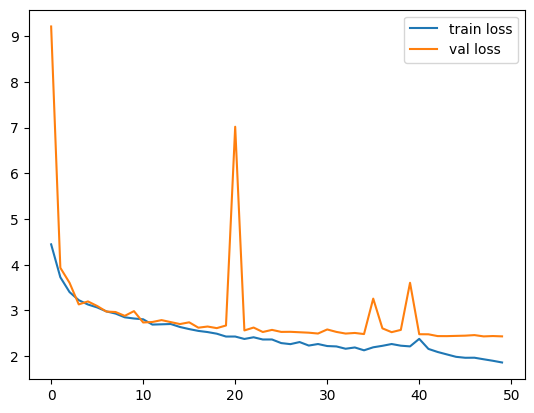

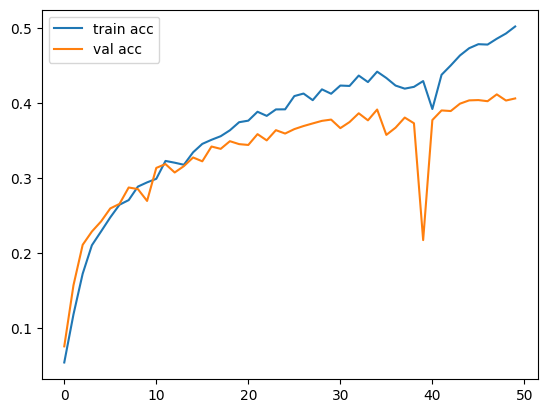

In [34]:
acc_loss_plots()


In [35]:
test_loss, test_acc = resnet_model.evaluate(x_test,y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 6s - 20ms/step - accuracy: 0.4086 - loss: 2.4033

Test accuracy: 0.40860000252723694


In [36]:
# make predictions
predictions = resnet_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step


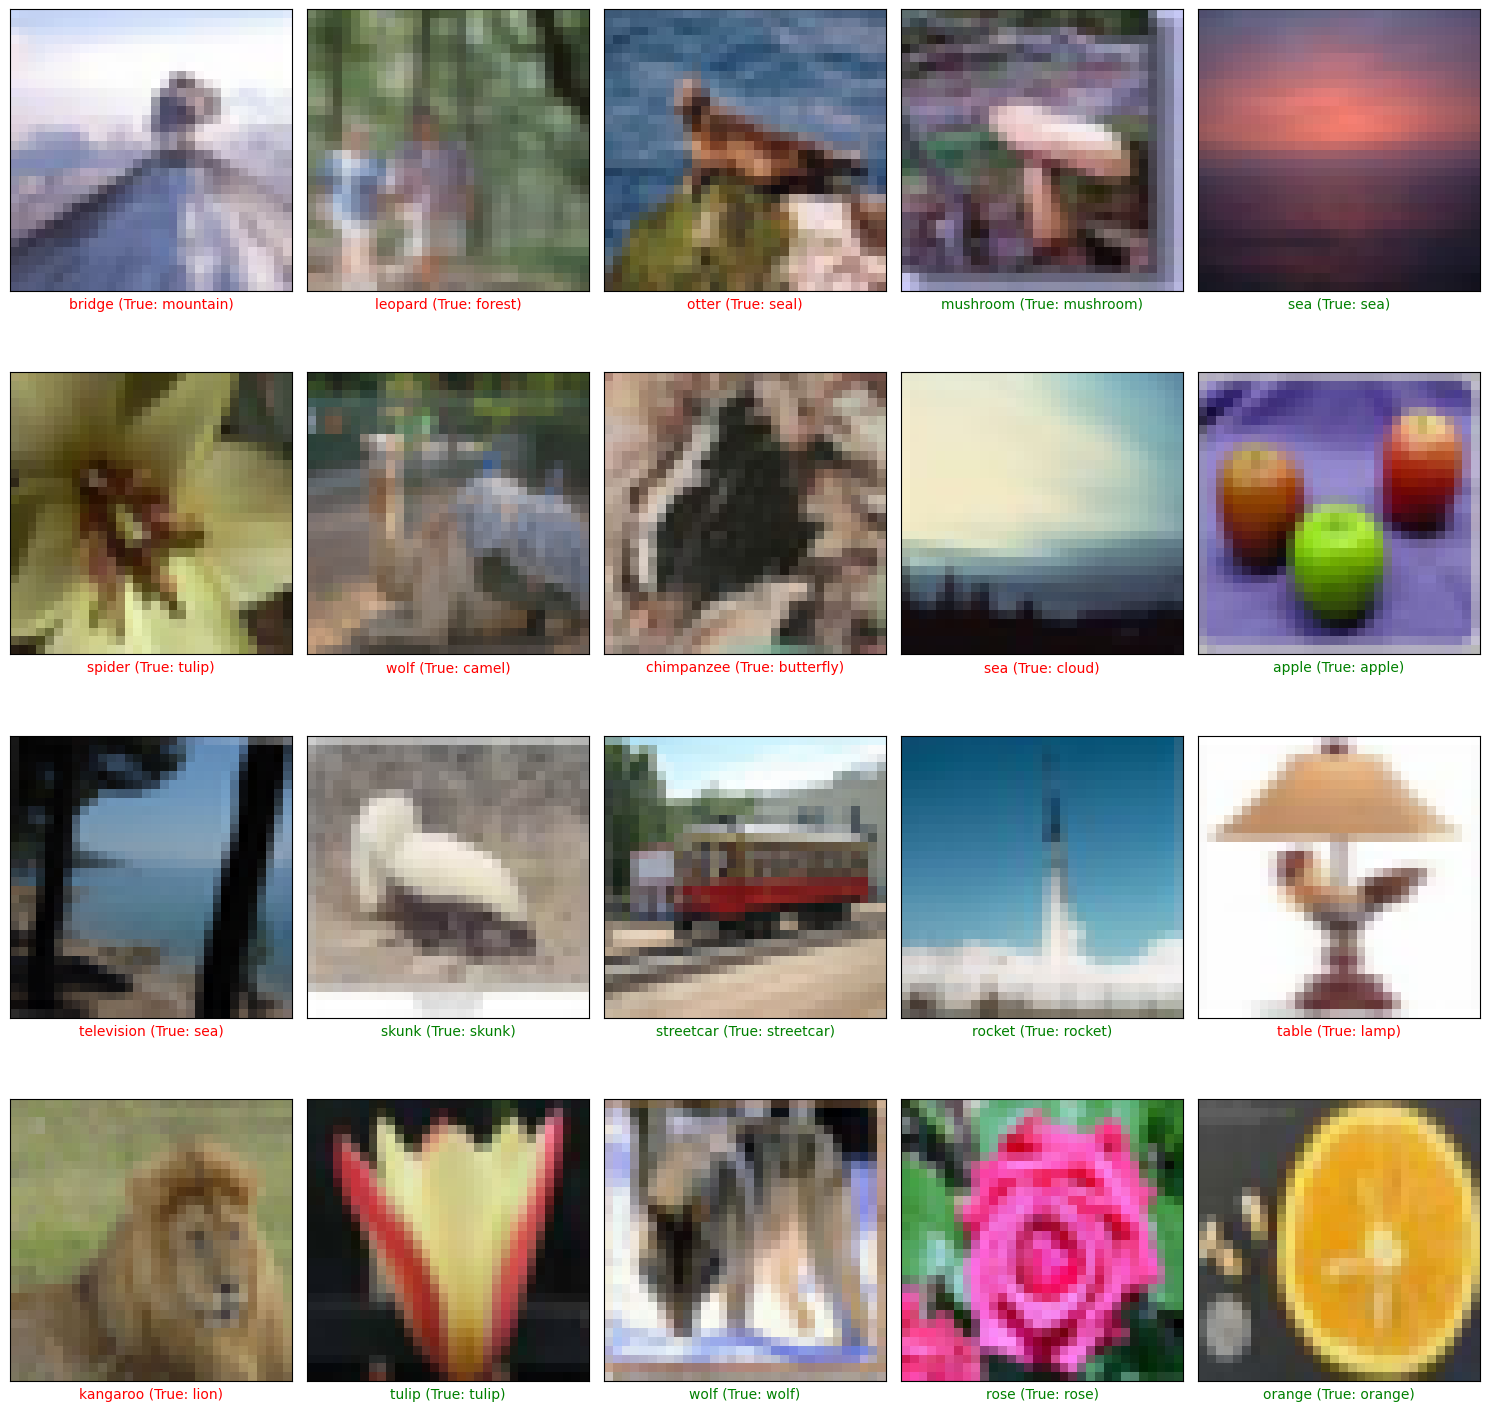

In [37]:
# visualize some predictions
visualize_predictions(predictions, x_test, y_test, classes_names, 20,4,5)

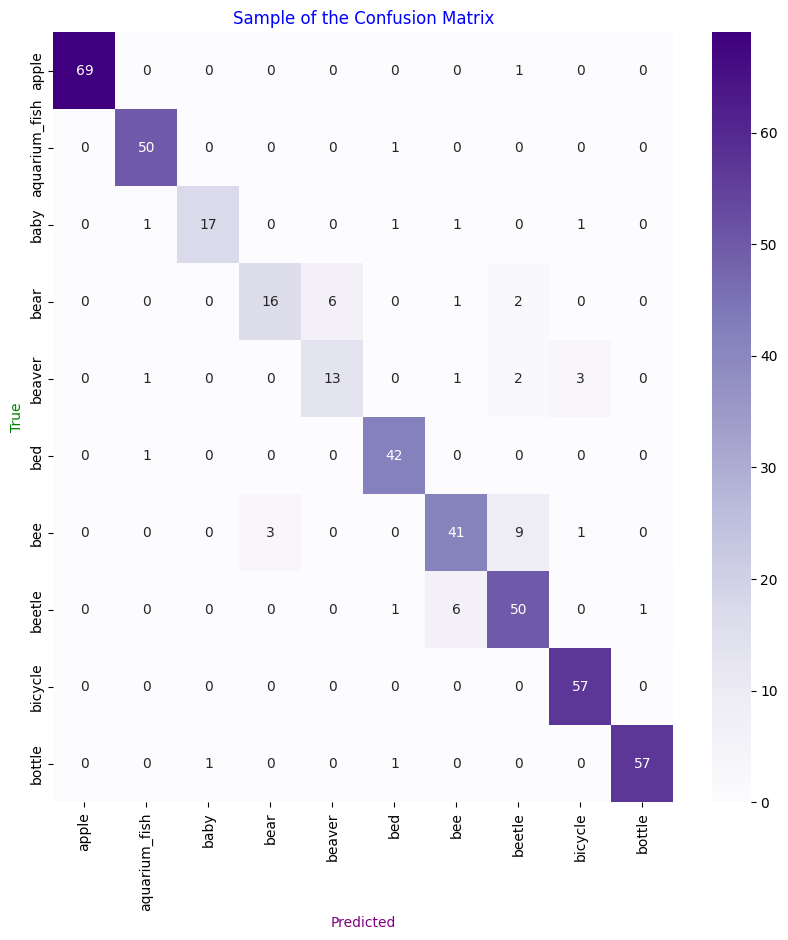

In [38]:
plot_confusion_matrix(predictions, y_test, classes_names, sample_size=10, color="Purples")

# YOLO Model for Testing

In [39]:
%pip install ultralytics

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 23.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-cls.pt")  

100%|██████████| 5.31M/5.31M [00:00<00:00, 92.5MB/s]


In [165]:
results = model.train(data="cifar100", epochs=20, imgsz=32)

Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=cifar100, epochs=20, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

train: Scanning /kaggle/working/datasets/cifar100/train... 50000 images, 0 corrupt: 100%|██████████| 50000/50000 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/cifar100/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/classify/train6
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 81.99it/s]

                   all      0.388      0.708



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 81.64it/s]

                   all      0.368      0.679



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 78.00it/s]


                   all      0.307      0.623

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 83.39it/s]


                   all       0.35      0.661

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 79.53it/s]

                   all       0.36      0.678



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 86.11it/s]

                   all      0.384      0.692



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 77.06it/s]

                   all      0.409      0.722



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 82.38it/s]

                   all      0.413      0.729



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 81.94it/s]


                   all      0.431      0.748

      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.159G      2.792         16         32: 100%|██████████| 3125/3125 [01:50<00:00, 28.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 80.76it/s]

                   all      0.443      0.751



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.159G      2.747         16         32: 100%|██████████| 3125/3125 [01:50<00:00, 28.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 80.89it/s]

                   all      0.448       0.76



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.159G       2.69         16         32: 100%|██████████| 3125/3125 [01:49<00:00, 28.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 78.01it/s]

                   all      0.463       0.77



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.159G      2.652         16         32: 100%|██████████| 3125/3125 [01:48<00:00, 28.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 82.89it/s]

                   all      0.466      0.772



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.159G      2.605         16         32: 100%|██████████| 3125/3125 [01:47<00:00, 28.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:04<00:00, 73.75it/s]

                   all      0.469      0.775



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.159G      2.544         16         32: 100%|██████████| 3125/3125 [01:50<00:00, 28.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 81.36it/s]

                   all      0.473      0.777



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.159G      2.515         16         32: 100%|██████████| 3125/3125 [01:50<00:00, 28.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 80.26it/s]

                   all      0.482      0.781



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.159G      2.474         16         32: 100%|██████████| 3125/3125 [01:51<00:00, 27.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 83.65it/s]


                   all      0.486      0.784

      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.159G      2.426         16         32: 100%|██████████| 3125/3125 [01:48<00:00, 28.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 82.12it/s]


                   all      0.489      0.789

      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.159G      2.376         16         32: 100%|██████████| 3125/3125 [01:49<00:00, 28.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 78.26it/s]

                   all      0.492      0.789



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.159G      2.325         16         32: 100%|██████████| 3125/3125 [01:48<00:00, 28.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 84.63it/s]

                   all      0.494      0.791



20 epochs completed in 0.641 hours.
Optimizer stripped from runs/classify/train6/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train6/weights/best.pt, 3.2MB

Validating runs/classify/train6/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,562,980 parameters, 0 gradients, 3.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /kaggle/working/datasets/cifar100/train... found 50000 images in 100 classes ✅ 
val: None...
test: /kaggle/working/datasets/cifar100/test... found 10000 images in 100 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:03<00:00, 79.02it/s]


                   all      0.494      0.792
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train6
Results saved to runs/classify/train6


lr/pg0,▁▅███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▁▅███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▁▅███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/accuracy_top1,▁▂▁▃▄▅▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████
metrics/accuracy_top5,▁▂▂▄▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/loss,█▆▇▅▅▄▄▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val/loss,▇▆█▆▅▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
lr/pg0,0.00337


**Model Evaluation**

In [166]:
import pandas as pd
df = pd.read_csv('/kaggle/working/runs/classify/train6/results.csv')
df.tail()

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
15,16,2.5146,0.4822,0.7810,4.2748,0.002575,0.002575,0.002575
16,17,2.4737,0.4858,0.7843,4.2712,0.002080,0.002080,0.002080
17,18,2.4261,0.4893,0.7886,4.2666,0.001585,0.001585,0.001585
18,19,2.3757,0.4919,0.7892,4.2631,0.001090,0.001090,0.001090
19,20,2.3245,0.4938,0.7915,4.2609,0.000595,0.000595,0.000595


In [167]:
print(df.columns.tolist())

['                  epoch', '             train/loss', '  metrics/accuracy_top1', '  metrics/accuracy_top5', '               val/loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']


In [168]:
print('Train Accuracy: ',df['  metrics/accuracy_top1'].max())

Train Accuracy:  0.4938


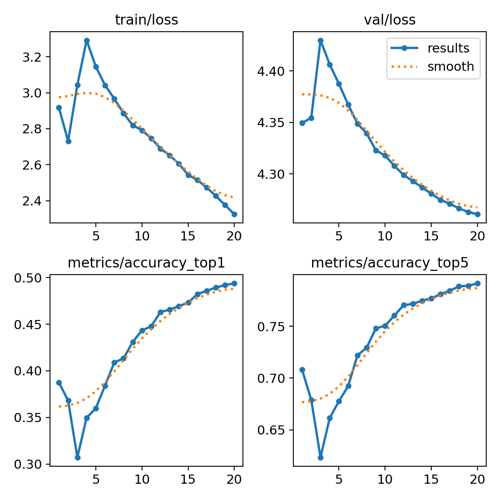

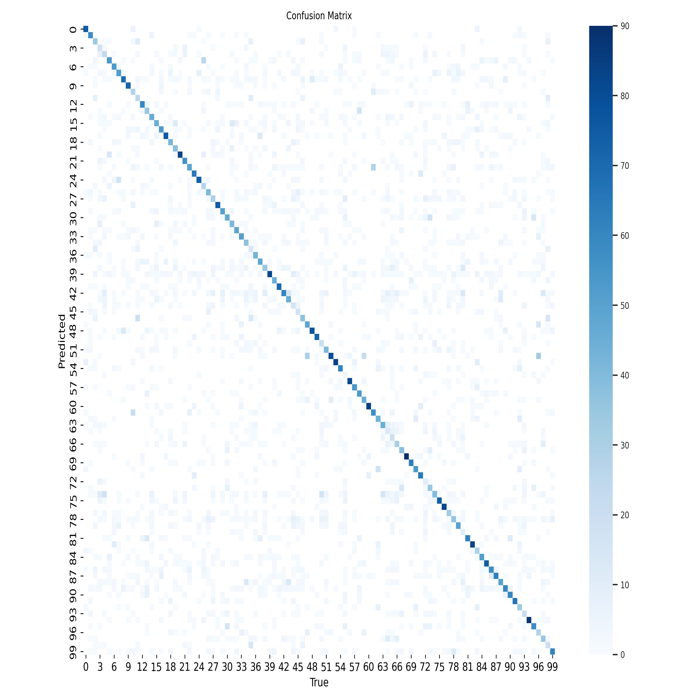

In [187]:
from PIL import Image
from IPython.display import display
# results image
result_img = Image.open('/kaggle/working/runs/classify/train6/results.png').resize((500, 500))
display(result_img)

# confusion matrix
mat_img = Image.open('/kaggle/working/runs/classify/train6/confusion_matrix.png').resize((700,700))
display(mat_img)

**Predict**

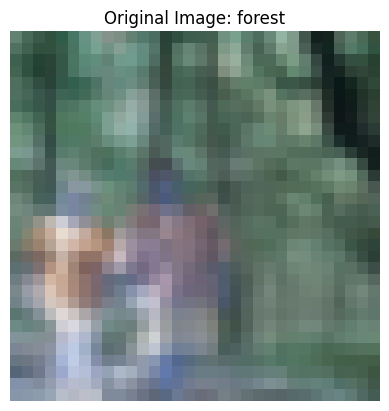


0: 32x32 forest 0.54, willow_tree 0.04, rabbit 0.04, kangaroo 0.04, squirrel 0.02, 3.7ms
Speed: 1.9ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
******************************
YOLO prediction: forest


In [172]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
image_np = (x_test[1] * 255).astype(np.uint8)
plt.imshow(cv.cvtColor(image_np, cv.COLOR_BGR2RGB))
plt.axis(False)
true_label = np.argmax(y_test[1])
plt.title("Original Image: "+classes_names[true_label])
plt.show()

image_pil = Image.fromarray(image_np)
results = model(image_pil)
top1_index = results[0].probs.top1
#print(top1_index)
print("*"*30)
print("YOLO prediction:",classes_names[top1_index])